In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [549]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [550]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [551]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


this are the first five rows of the dataset.

In [552]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


this are the last five rows of the dataset.

In [553]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
269,LP001884,Female,No,1,Graduate,No,2876,1560.000000,90.0,360.0,1.0,Urban,Y
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.000000,119.0,360.0,0.0,Rural,N
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.000000,260.0,360.0,1.0,Urban,Y
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.000000,26.0,360.0,1.0,Semiurban,Y
282,LP001915,Male,Yes,2,Graduate,No,2301,985.799988,78.0,180.0,1.0,Urban,Y


this are the some random samples taken by the dataset.

In [554]:
df.shape

(614, 13)

this dataset contains 614 rows and 13 columns('features') out of that 1 is our target variable 'Loan_Status'

In [555]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here 4 features datatype is ('float64') and 1 is ('int64') and 8 is ('object')


In [557]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here are the datatypes of the dataset

In [558]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

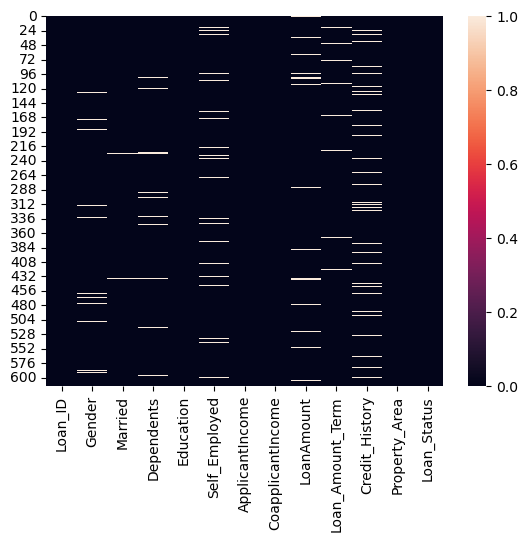

In [559]:
sns.heatmap(df.isnull())

as we can see in this dataset we are having some null values. let's handle it.

In [560]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [561]:
imp=SimpleImputer(strategy='most_frequent')


In [562]:
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [563]:
emp=SimpleImputer(strategy='mean')

In [564]:
df['LoanAmount']=emp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=emp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=emp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [565]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here we filled the null values.

<Axes: >

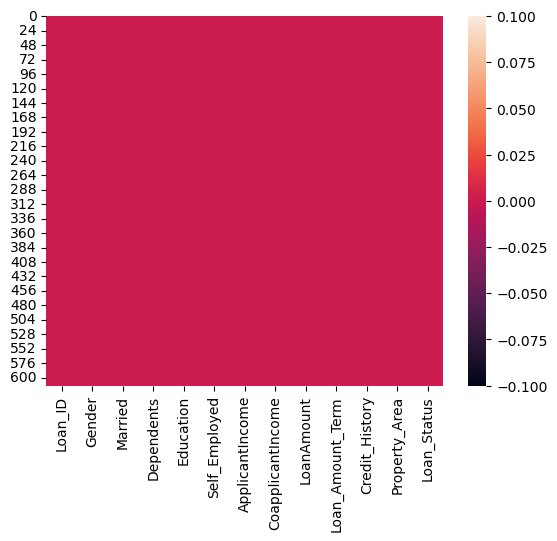

In [566]:
sns.heatmap(df.isnull())

In [567]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.

In [568]:
df.nunique().to_frame('unique values')

,unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


In [569]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


the features ('ApplicantIncome','CoapplicantIncome','LoanAmount') mean value is greater than the median(50%) percentile value it means this features are right skewed.

and the features('Loan_Amount_Term','Credit_History') mean value is less than the median(50%) percentile value it means this features are left skewed.

and also we have difference between their (75%) percentile and the (100%) value.

# Separating the features.


In [570]:
# here we are separating categorical columns and the numerical columns.
categorical_col=[]
numerical_col=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
        
print('numerical_columns',numerical_col)
print('\n')
print('categorical_columns',categorical_col)

numerical_columns ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


categorical_columns ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


# Data Analysis.

univariate

In [571]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Male      502
Female    112
Name: Gender, dtype: int64


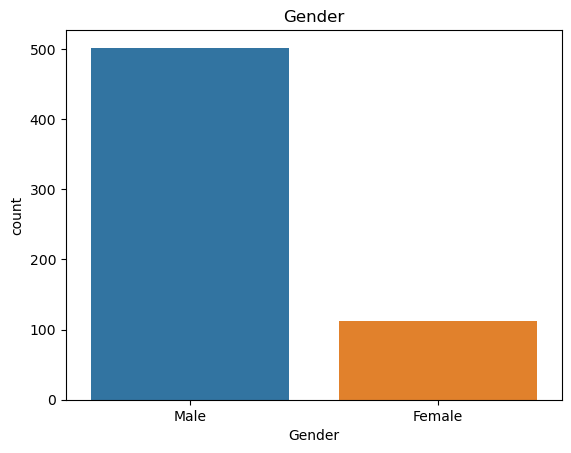

In [572]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df)
plt.title('Gender')
plt.show()

here the male count is high.

Yes    401
No     213
Name: Married, dtype: int64


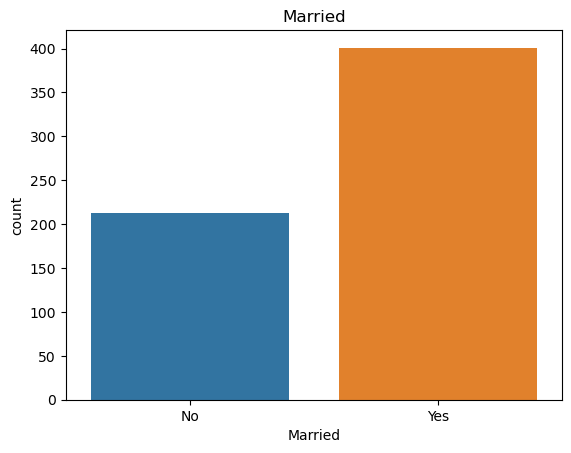

In [573]:
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df)
plt.title('Married')
plt.show()

the married('yes') count is high.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


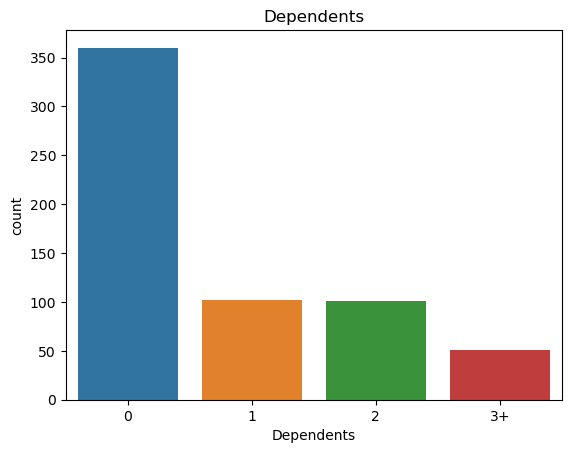

In [574]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)
plt.title('Dependents')
plt.show()

In [575]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


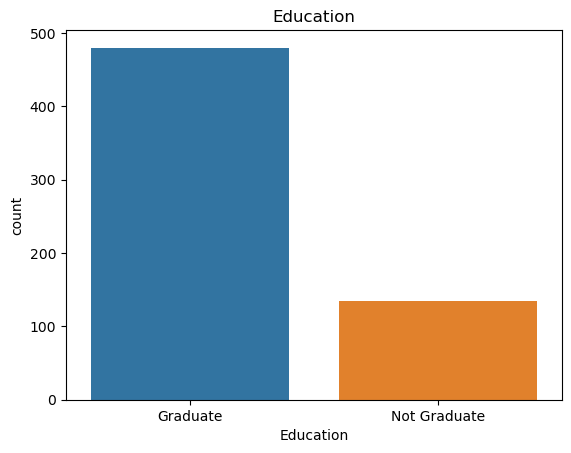

In [576]:
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df)
plt.title('Education')
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


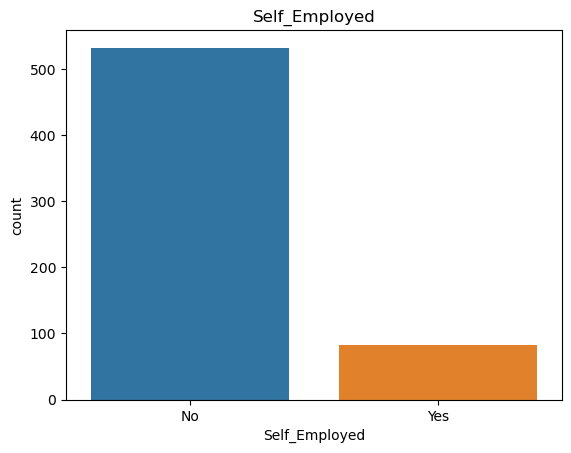

In [577]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df)
plt.title('Self_Employed')
plt.show()

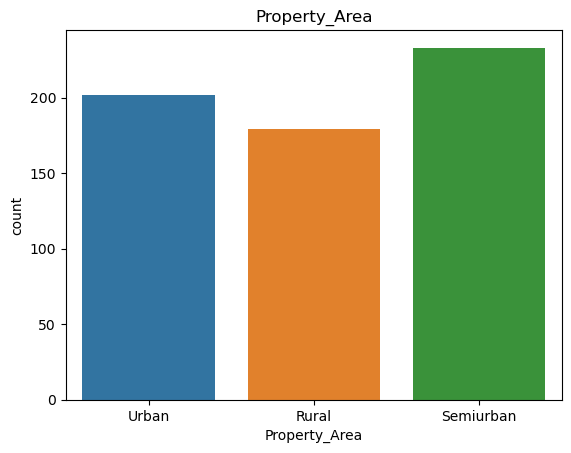

In [578]:
sns.countplot(x='Property_Area',data=df)
plt.title('Property_Area')
plt.show()

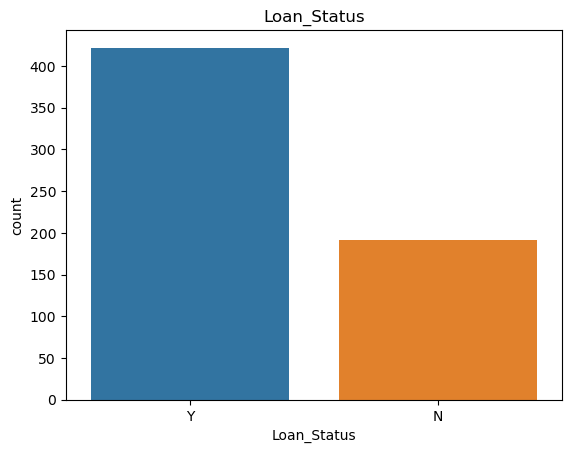

In [579]:
sns.countplot(x='Loan_Status',data=df)
plt.title('Loan_Status')
plt.show()

5403.459283387622
3812.5
0    2500
Name: ApplicantIncome, dtype: int64


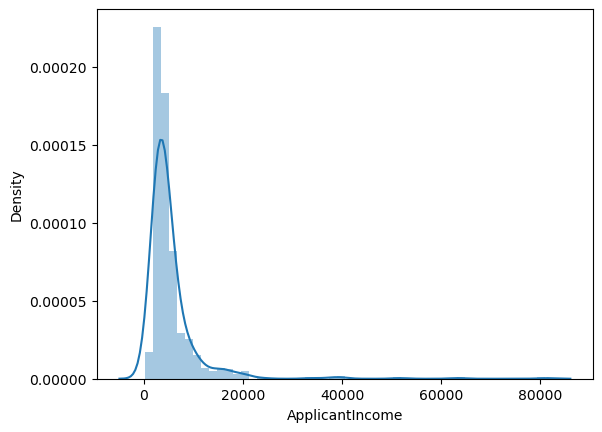

1621.2457980271008
1188.5
0    0.0
Name: CoapplicantIncome, dtype: float64


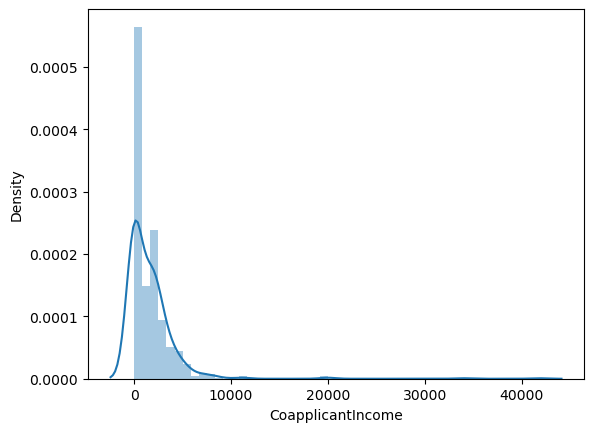

146.41216216216216
129.0
0    146.412162
Name: LoanAmount, dtype: float64


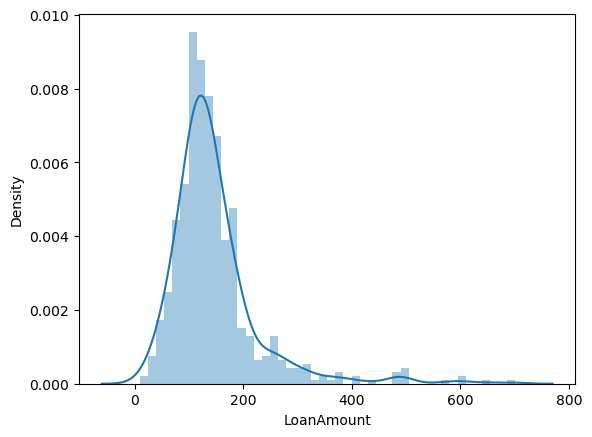

342.0
360.0
0    360.0
Name: Loan_Amount_Term, dtype: float64


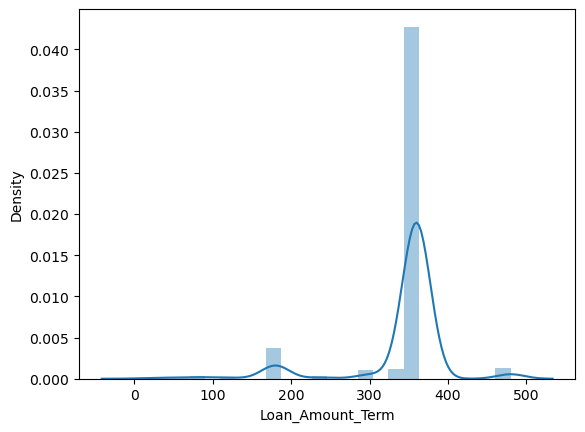

0.8421985815602836
1.0
0    1.0
Name: Credit_History, dtype: float64


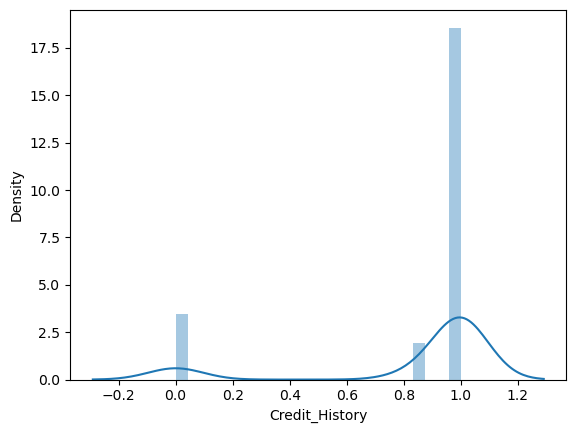

In [580]:
for i in numerical_col:
    print(df[i].mean())
    print(df[i].median())
    print(df[i].mode())
    sns.distplot(df[i])
    plt.show()

In [581]:
categorical_col.remove('Loan_ID')

In [582]:
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

81000
150
5403.459283387622


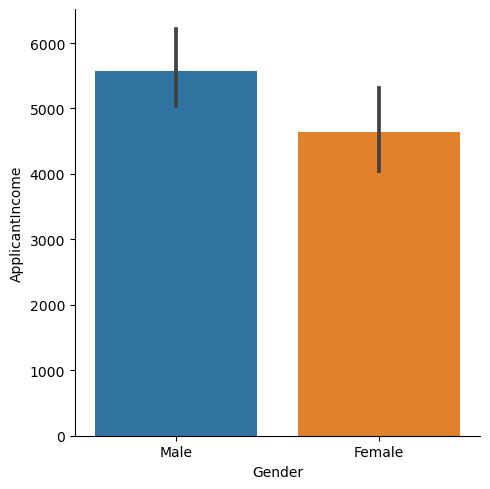

In [583]:
print(df['ApplicantIncome'].max())
print(df['ApplicantIncome'].min())
print(df['ApplicantIncome'].mean())
sns.catplot(x='Gender',y='ApplicantIncome',data=df,kind='bar')
plt.show()

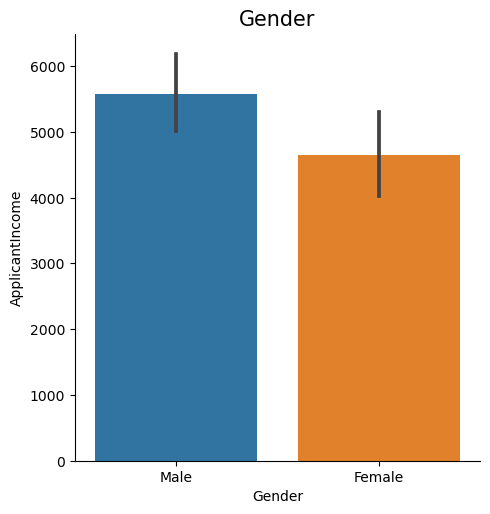

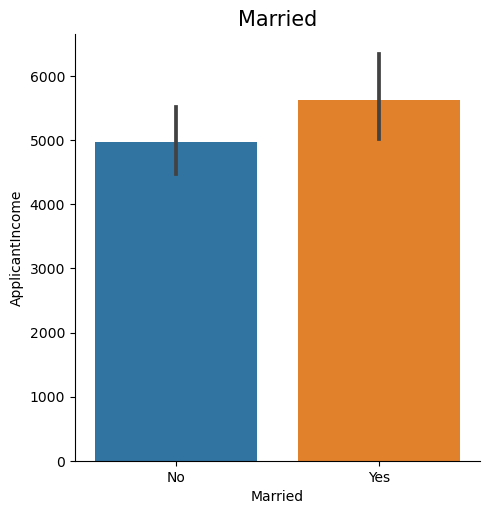

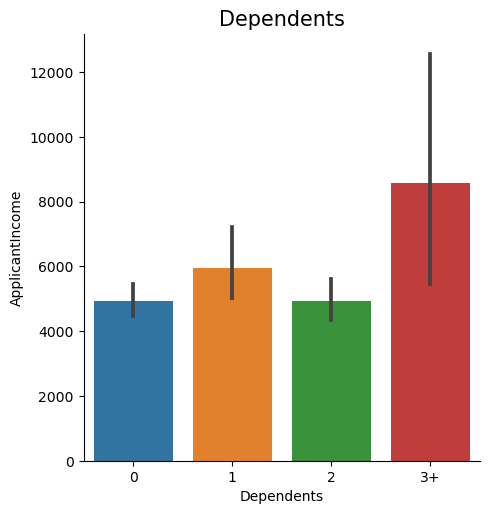

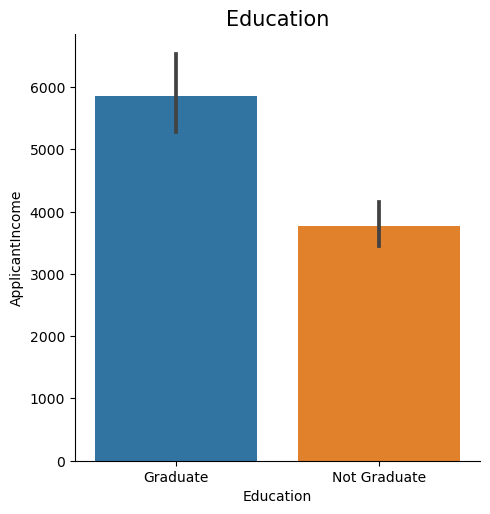

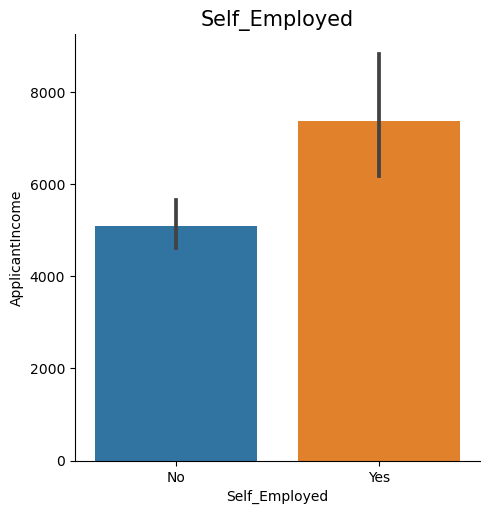

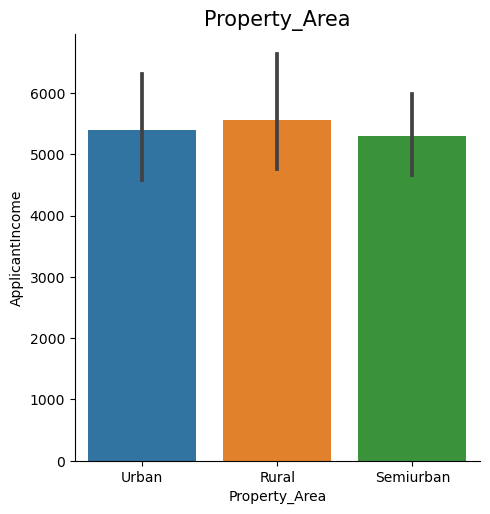

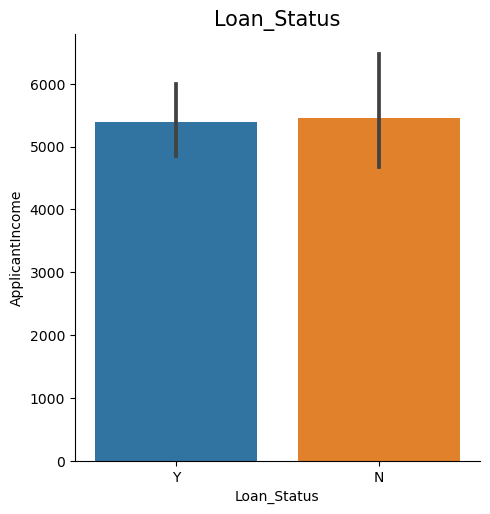

In [584]:
for i in categorical_col:
    sns.catplot(kind='bar',x=i,y='ApplicantIncome',data=df)
    plt.title(i,fontsize=15)
    plt.show()

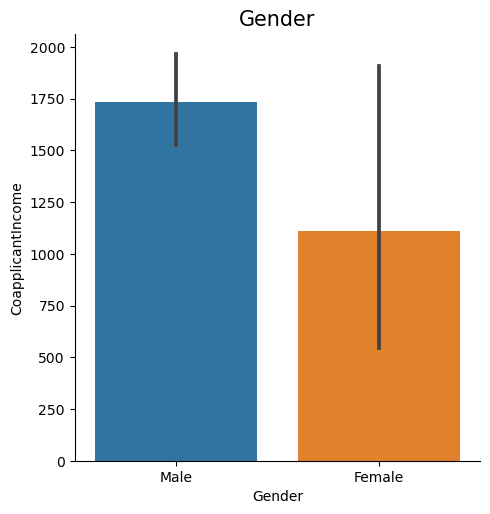

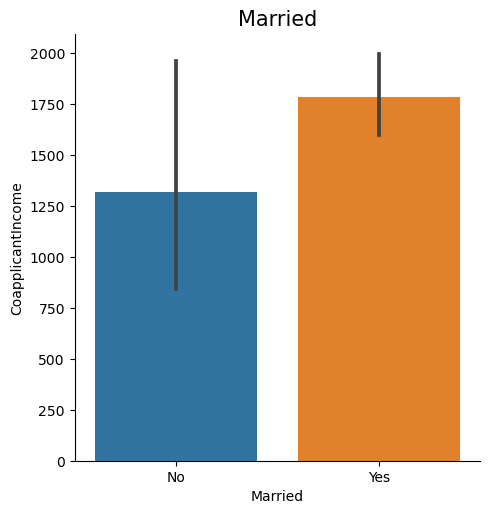

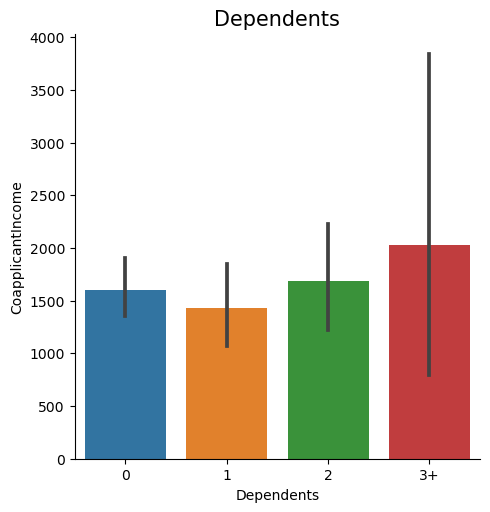

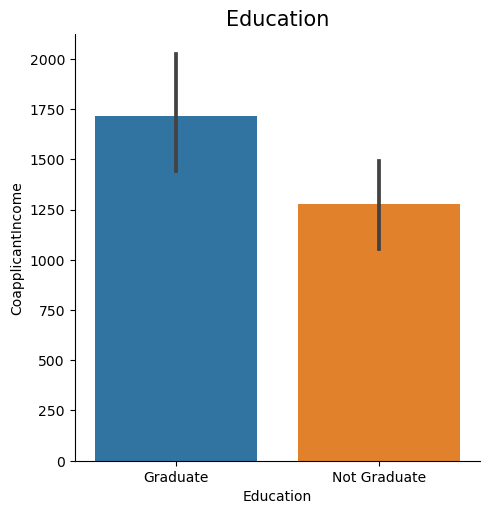

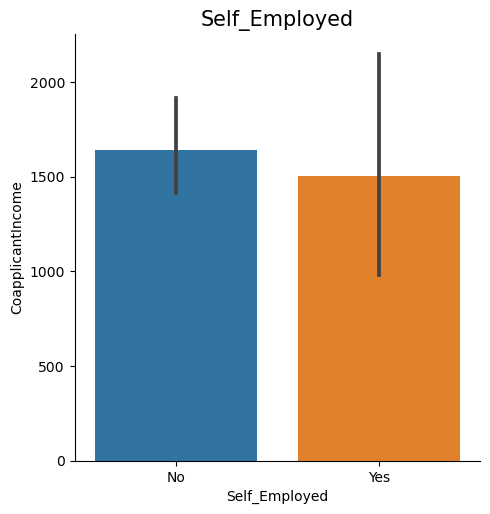

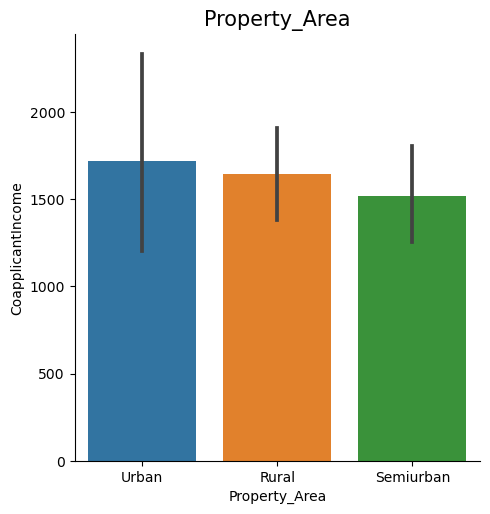

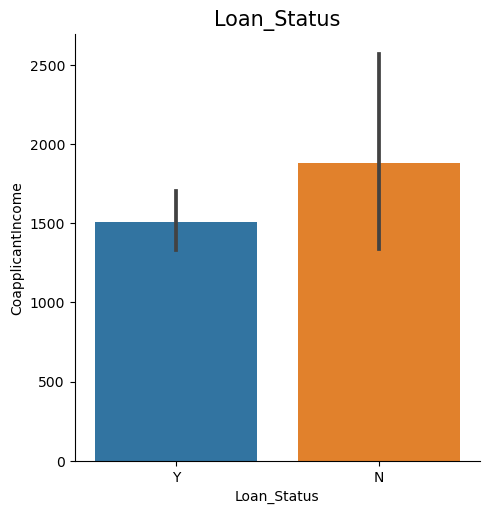

In [585]:
for i in categorical_col:
    sns.catplot(x=i,y='CoapplicantIncome',data=df,kind='bar')
    plt.title(i,fontsize=15)
    plt.show()

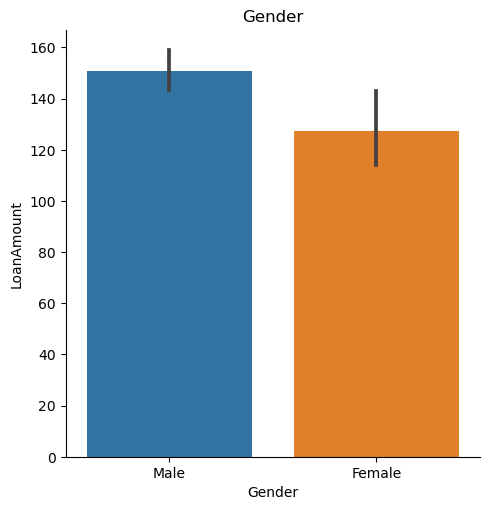

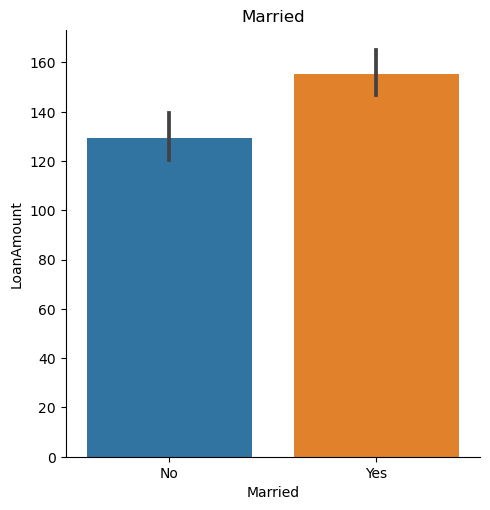

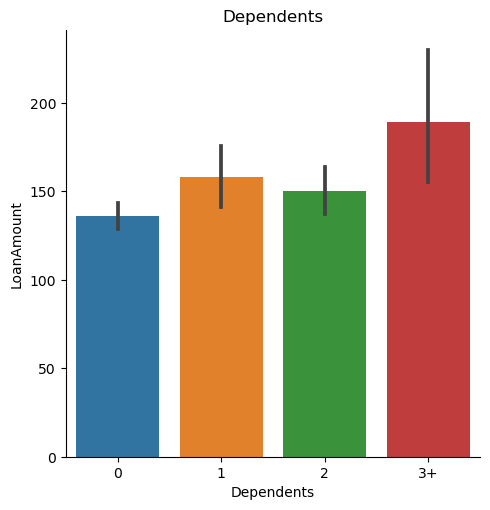

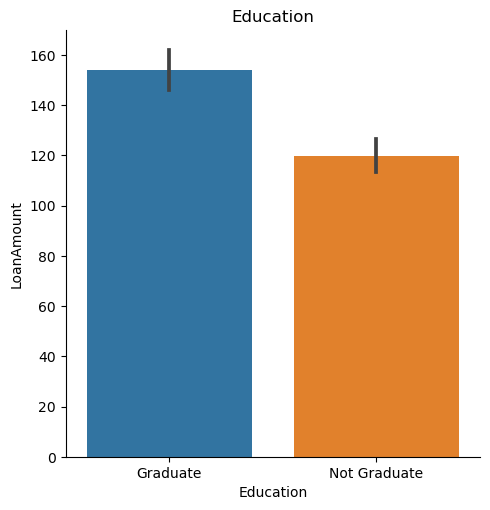

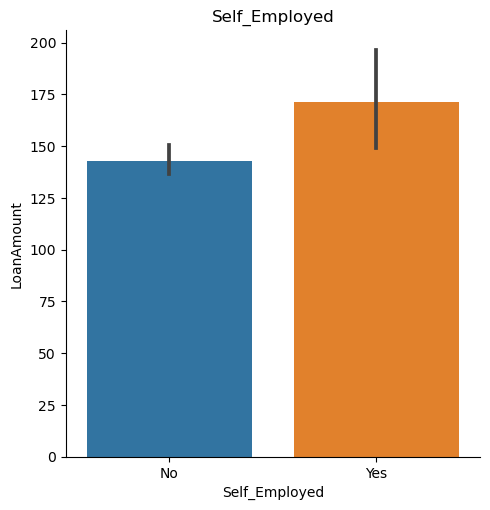

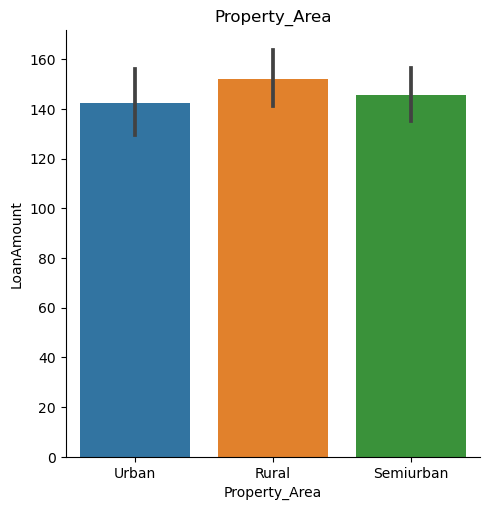

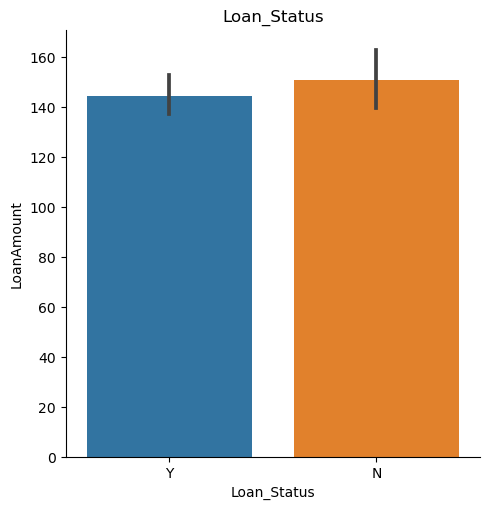

In [586]:
for i in categorical_col:
    sns.catplot(x=i,y='LoanAmount',data=df,kind='bar')
    plt.title(i)
    plt.show()

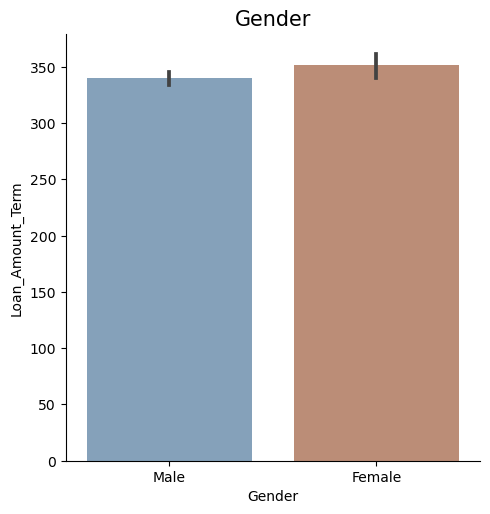

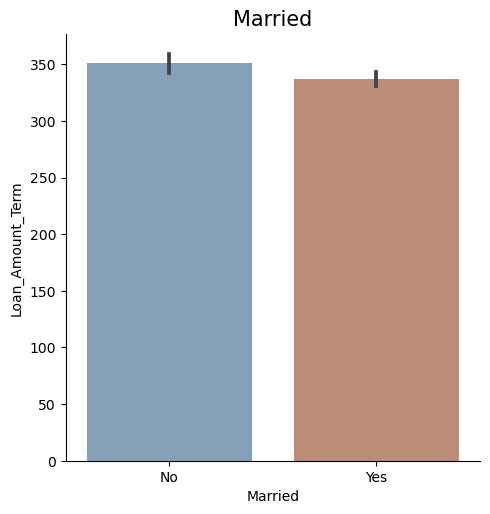

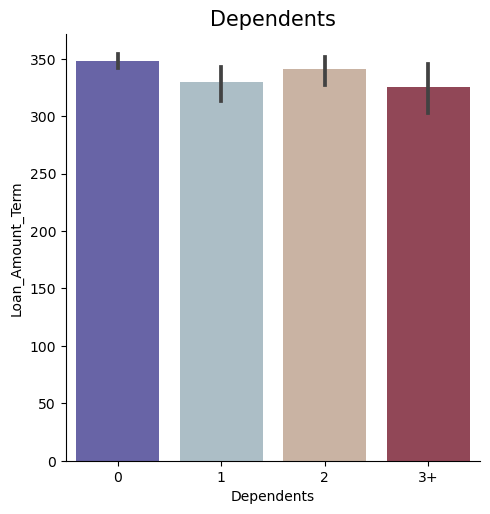

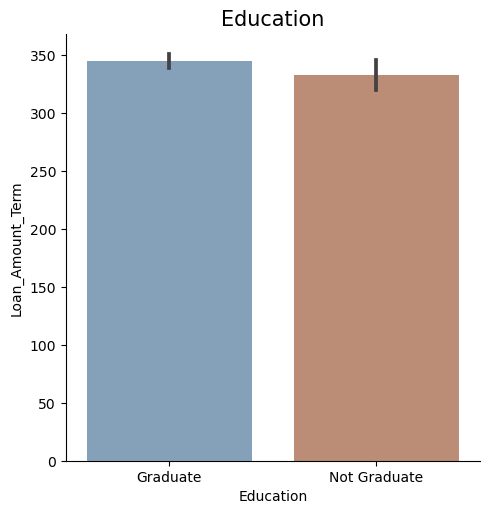

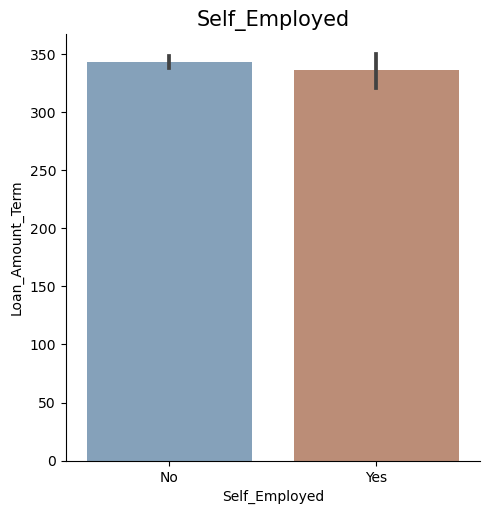

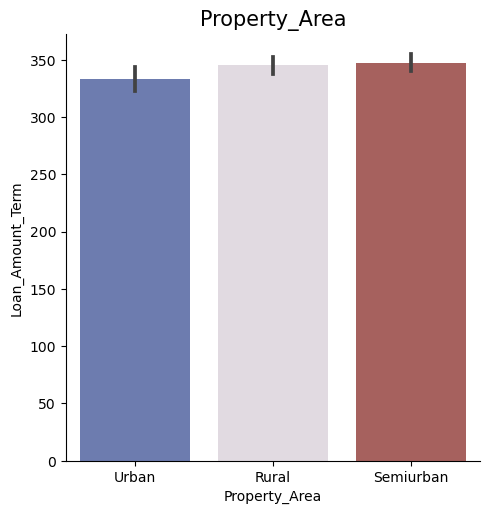

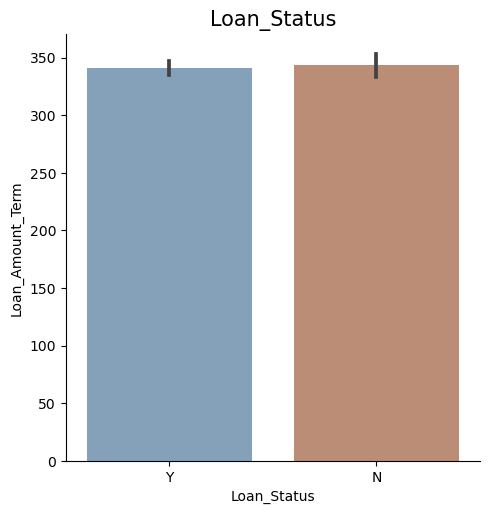

In [587]:
for i in categorical_col:
    sns.catplot(x=i,y='Loan_Amount_Term',data=df,kind='bar',palette='twilight_shifted')
    plt.title(i,fontsize=15)
    plt.show()

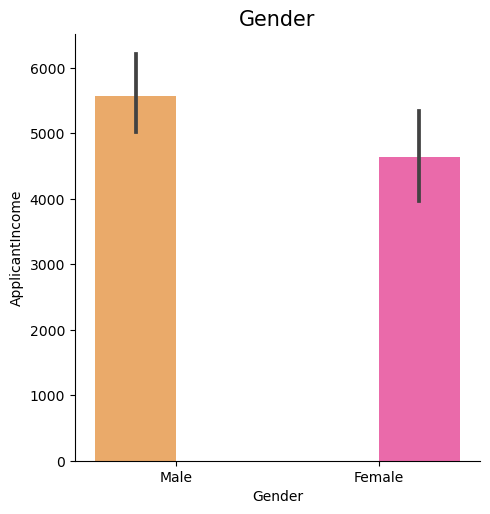

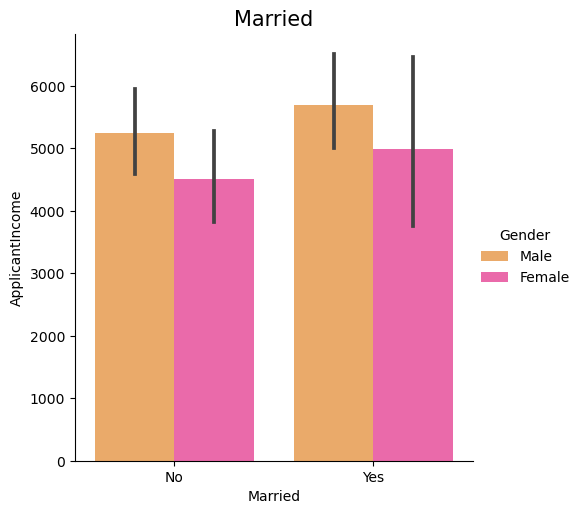

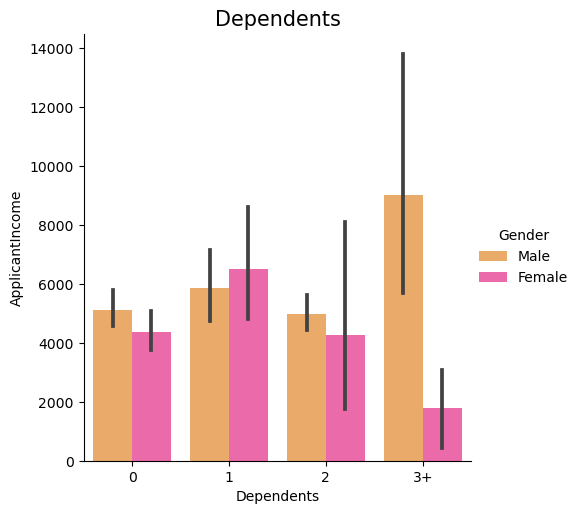

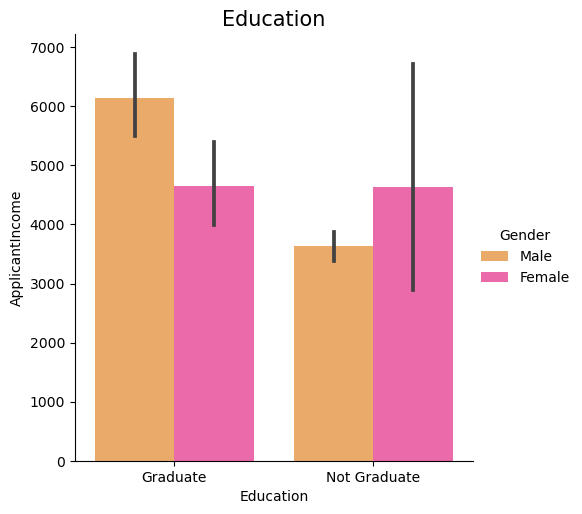

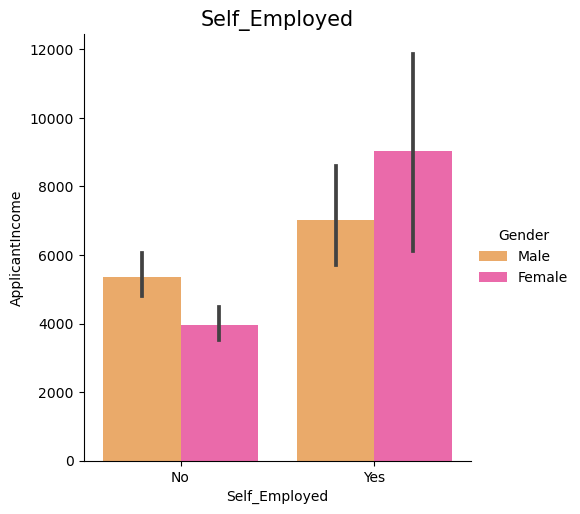

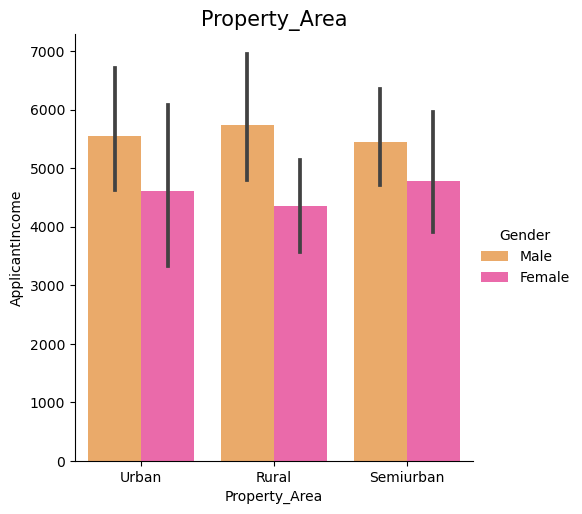

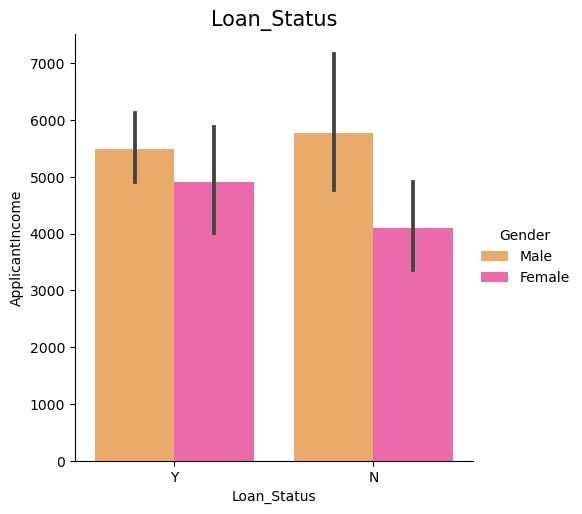

In [588]:
for i in categorical_col:
    sns.catplot(x=i,y='ApplicantIncome',data=df,hue='Gender',kind='bar',palette='spring_r')
    plt.title(i,fontsize=15)
    plt.show()

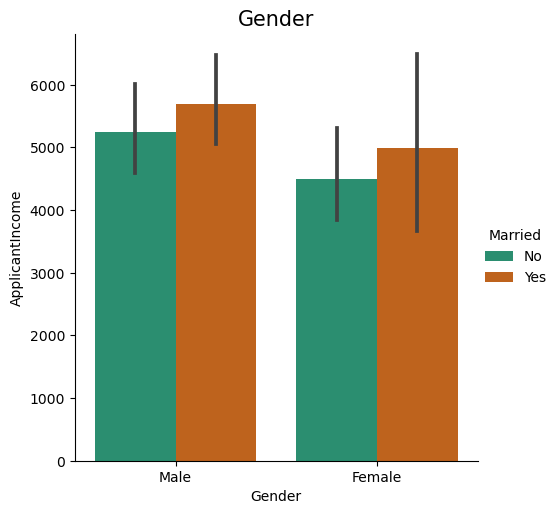

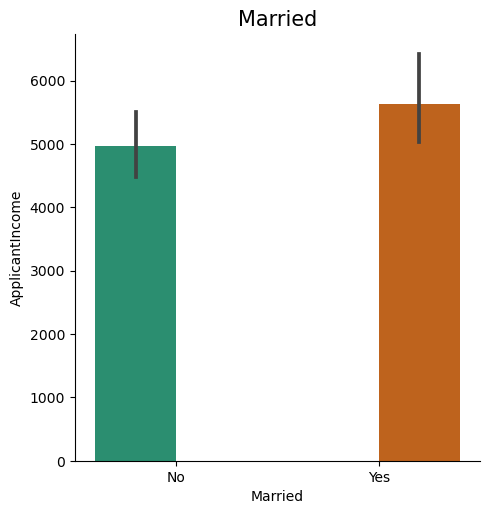

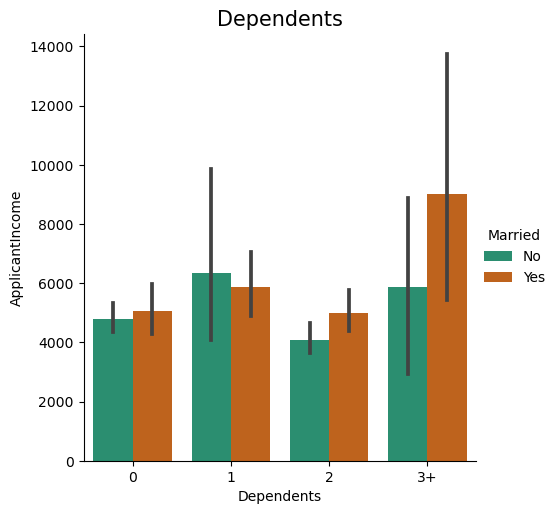

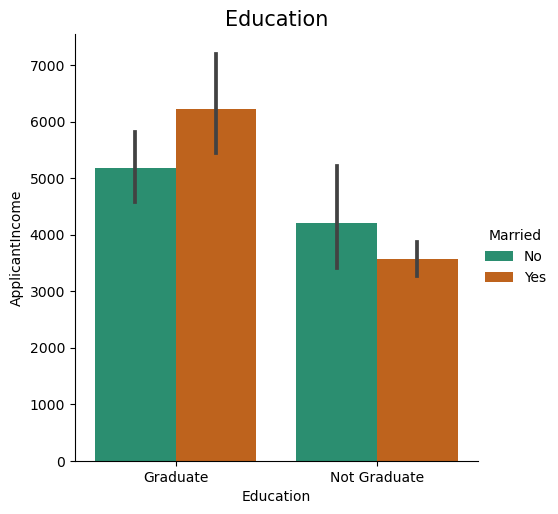

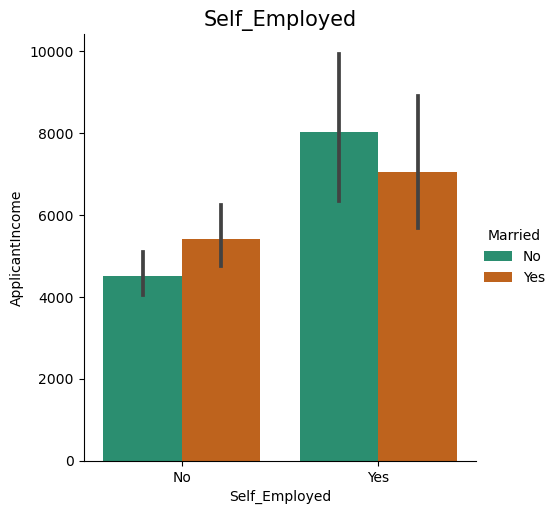

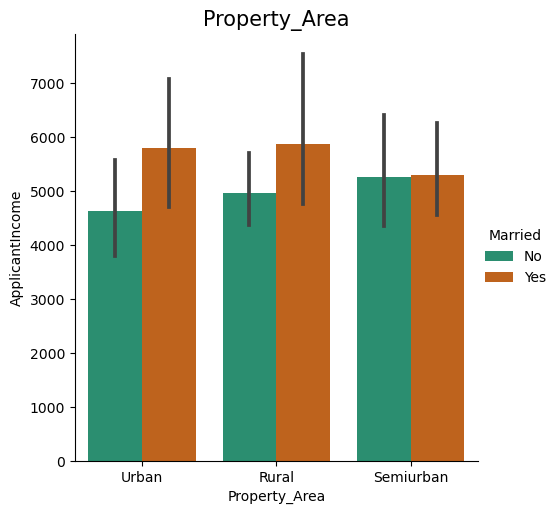

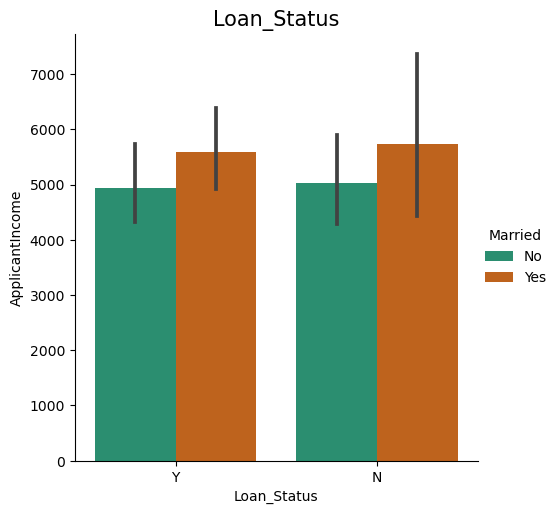

In [589]:
for i in categorical_col:
    sns.catplot(x=i,y='ApplicantIncome',data=df,hue='Married',kind='bar',palette='Dark2')
    plt.title(i,fontsize=15)
    plt.show()

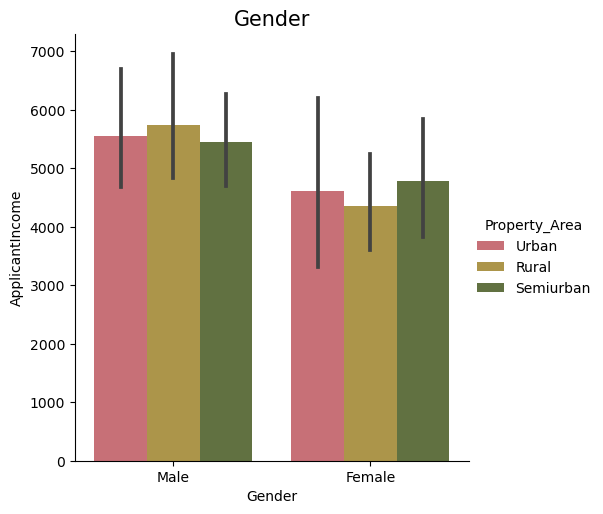

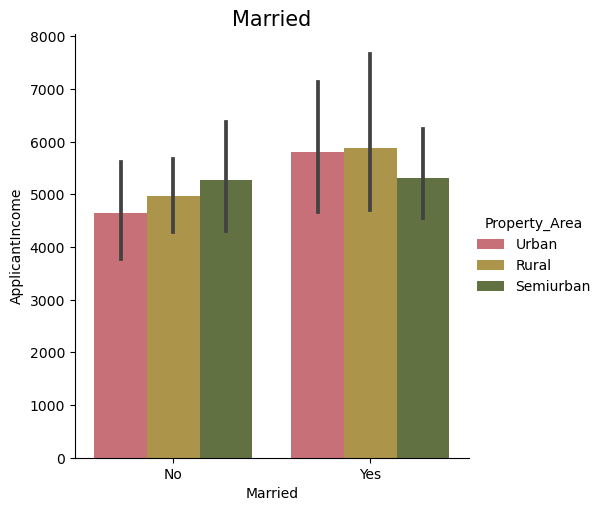

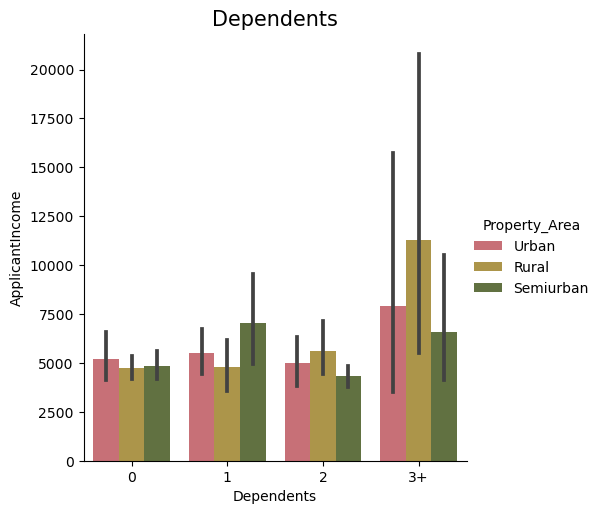

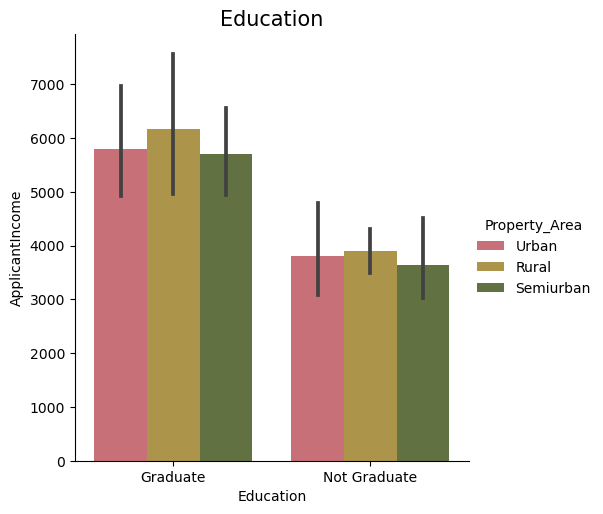

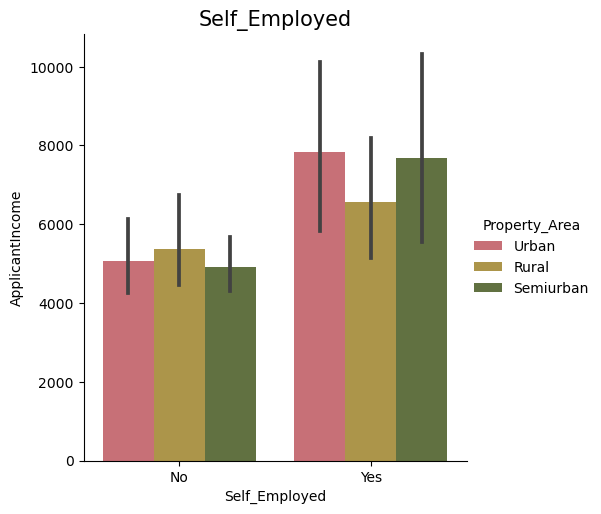

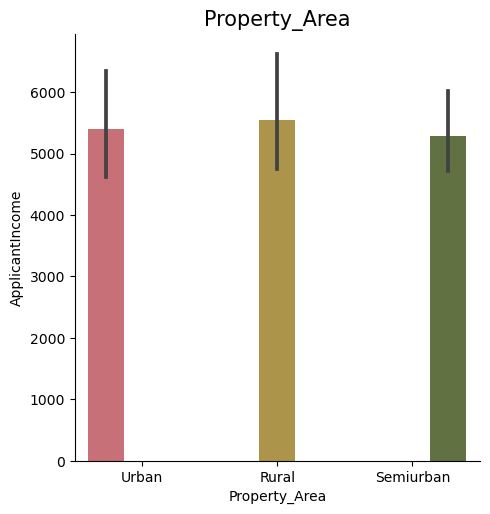

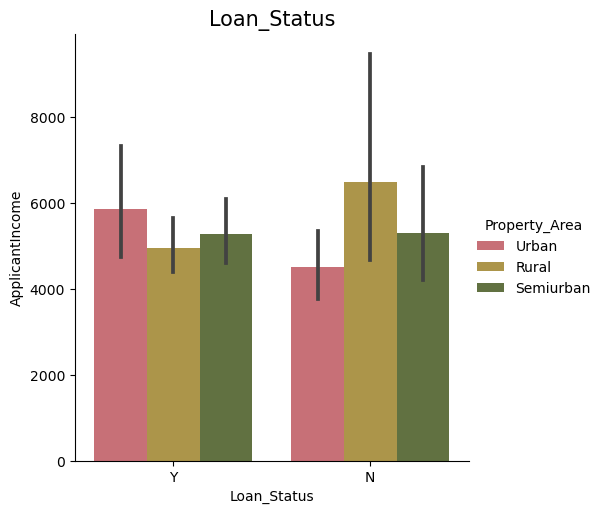

In [590]:
for i in categorical_col:
    sns.catplot(x=i,y='ApplicantIncome',data=df,hue='Property_Area',kind='bar',palette='tab20b_r')
    plt.title(i,fontsize=15)
    plt.show()

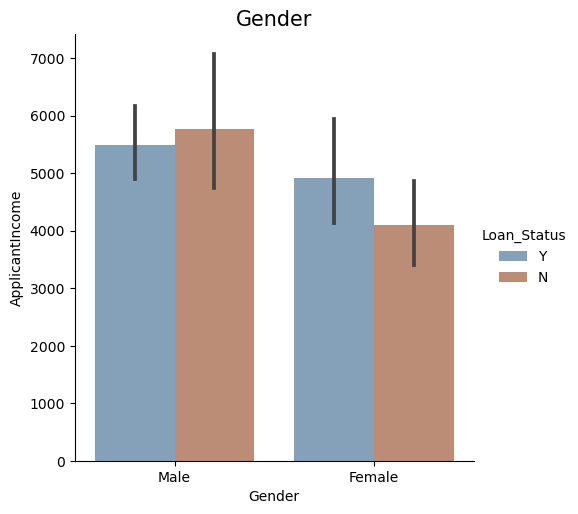

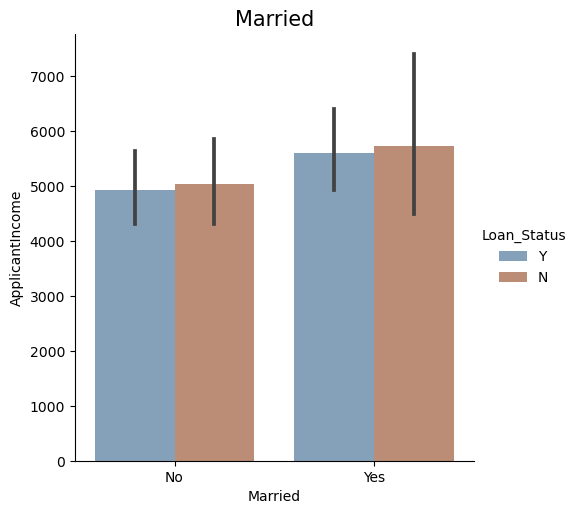

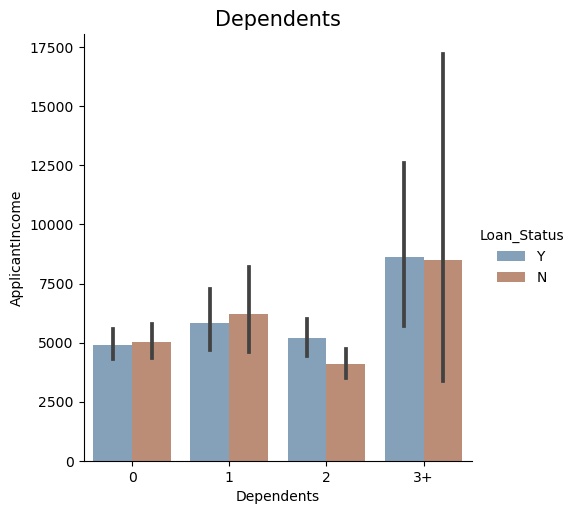

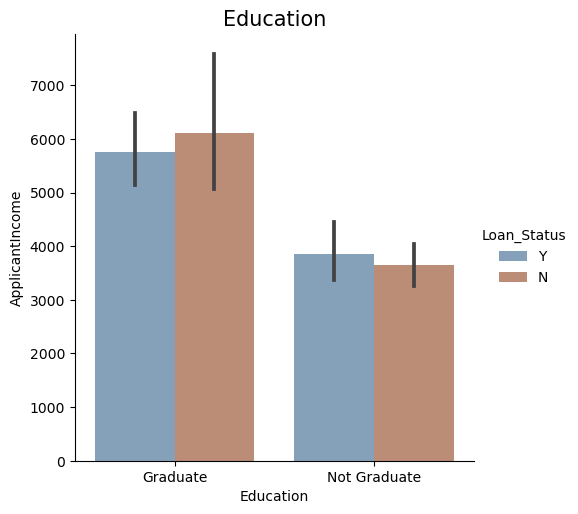

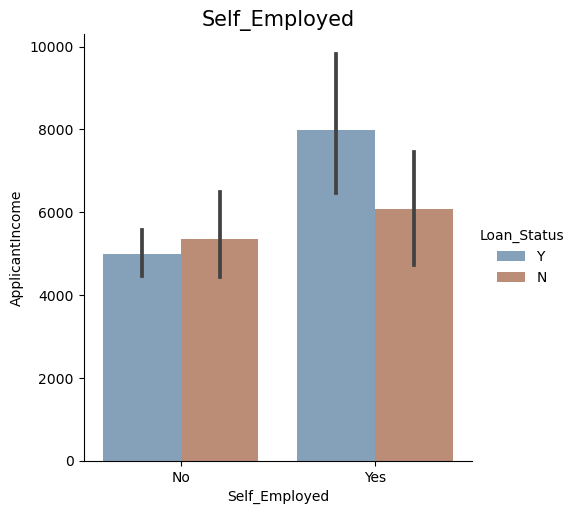

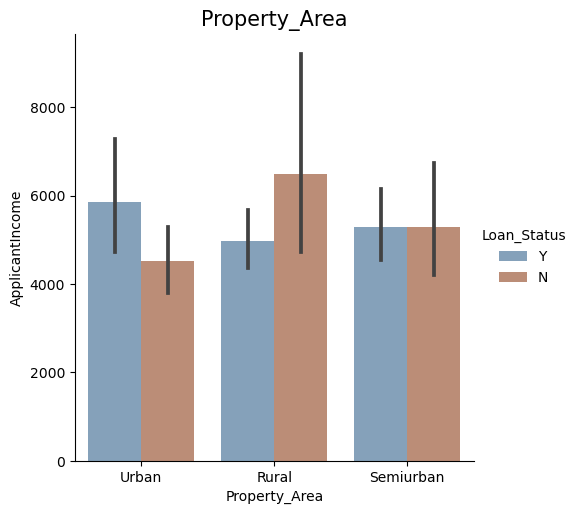

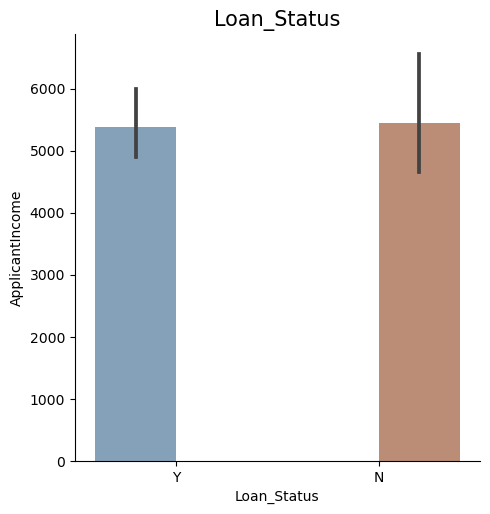

In [591]:
for i in categorical_col:
    sns.catplot(x=i,y='ApplicantIncome',data=df,hue='Loan_Status',kind='bar',palette='twilight_shifted')
    plt.title(i,fontsize=15)
    plt.show()

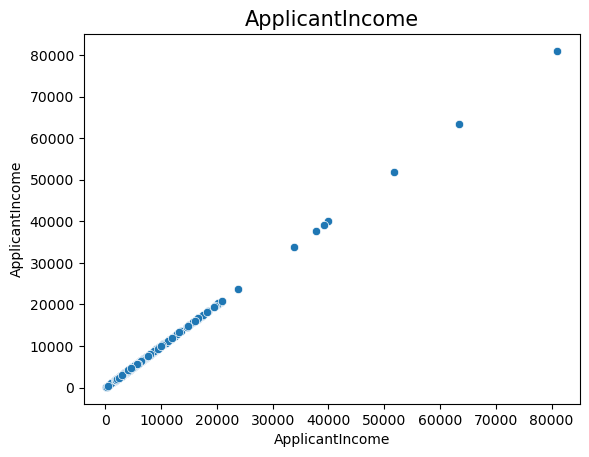

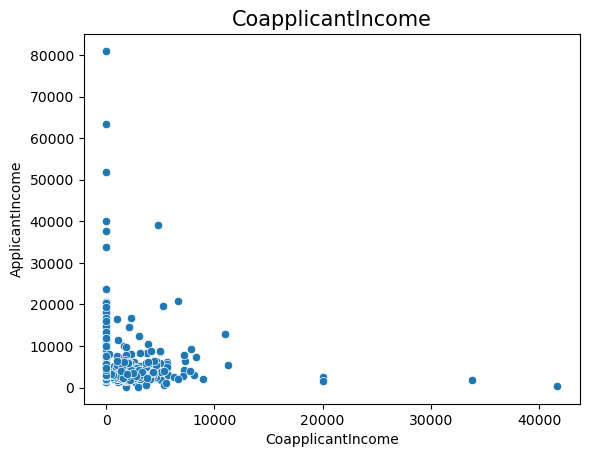

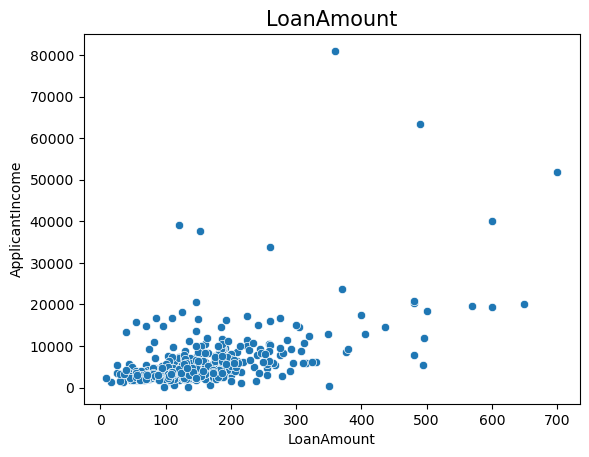

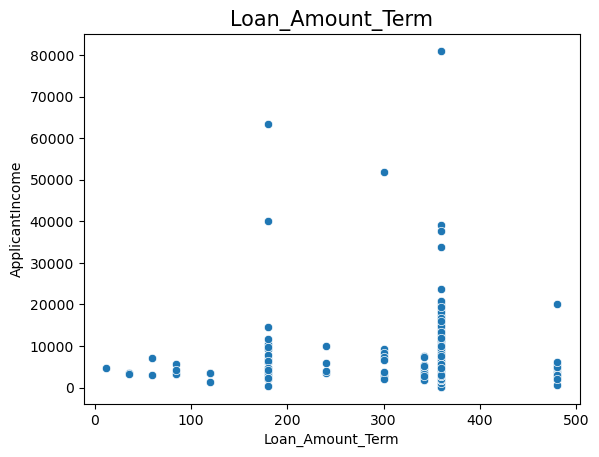

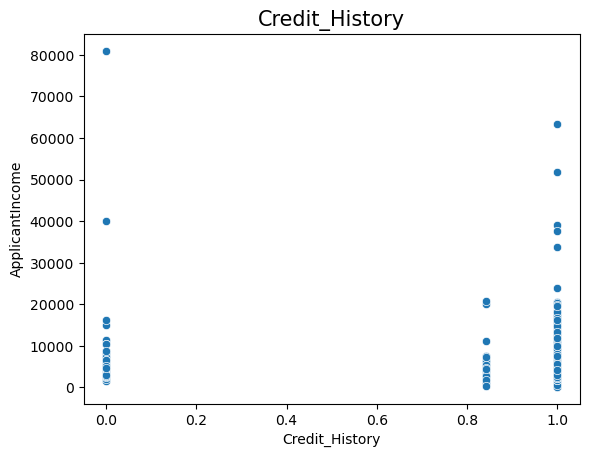

In [592]:
for i in numerical_col:
    sns.scatterplot(x=i,y='ApplicantIncome',data=df)
    plt.title(i,fontsize=15)
    plt.show()

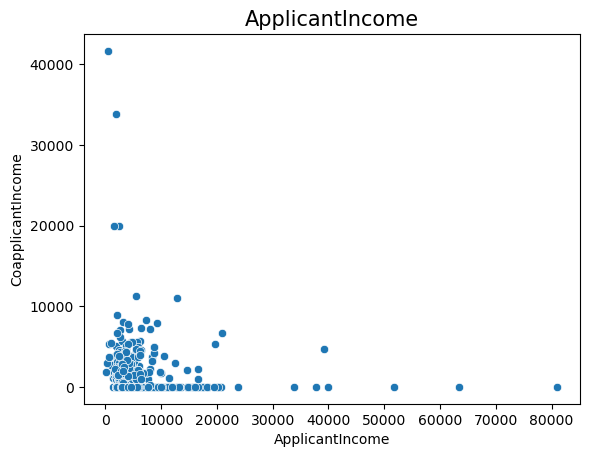

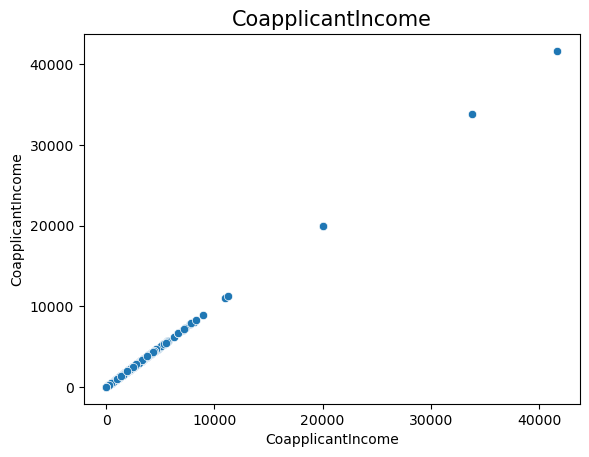

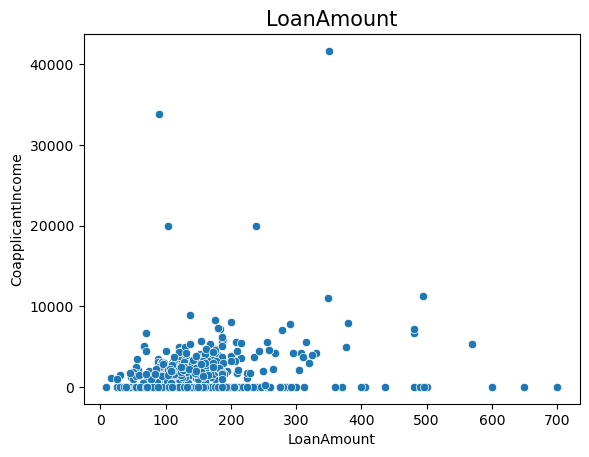

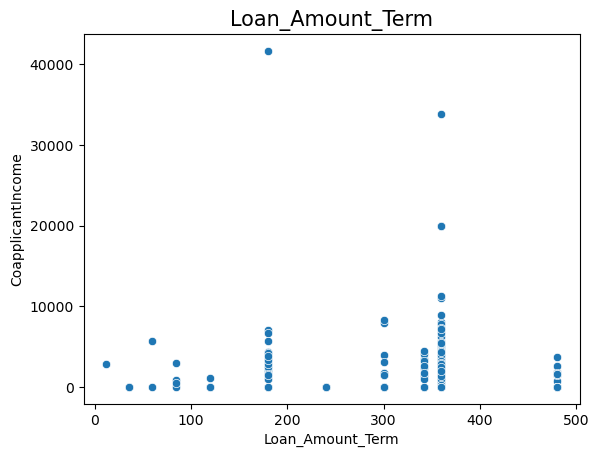

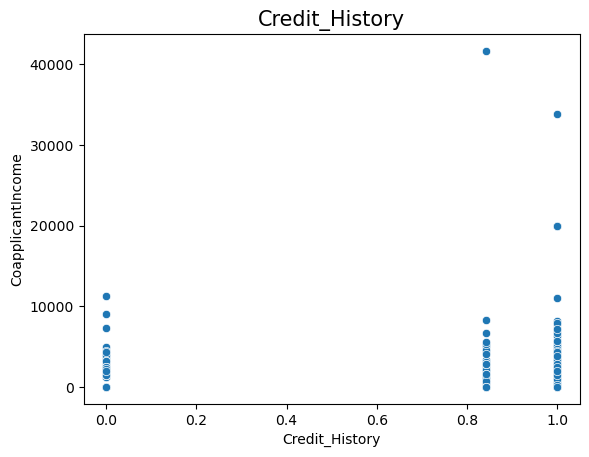

In [593]:
for i in numerical_col:
    sns.scatterplot(x=i,y='CoapplicantIncome',data=df)
    plt.title(i,fontsize=15)
    plt.show()

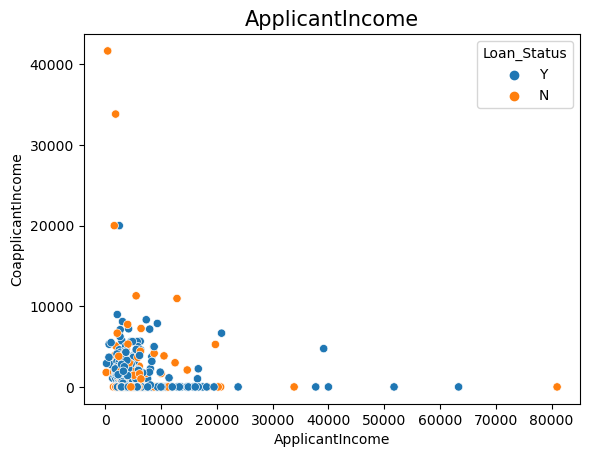

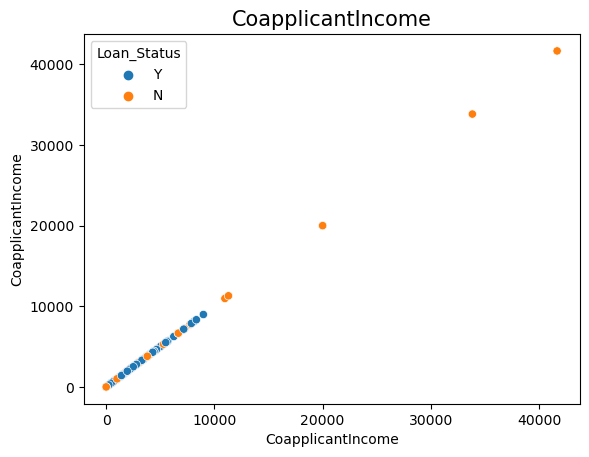

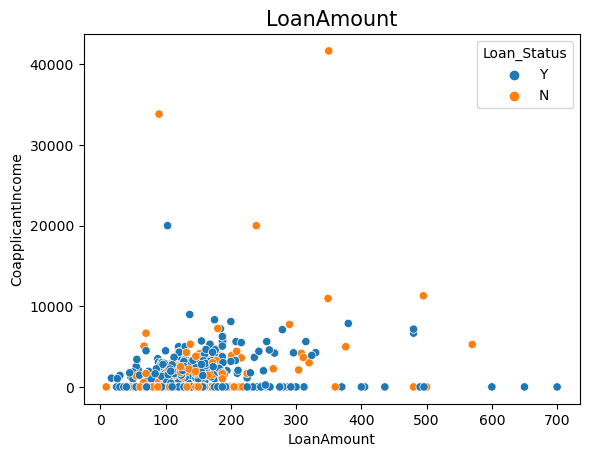

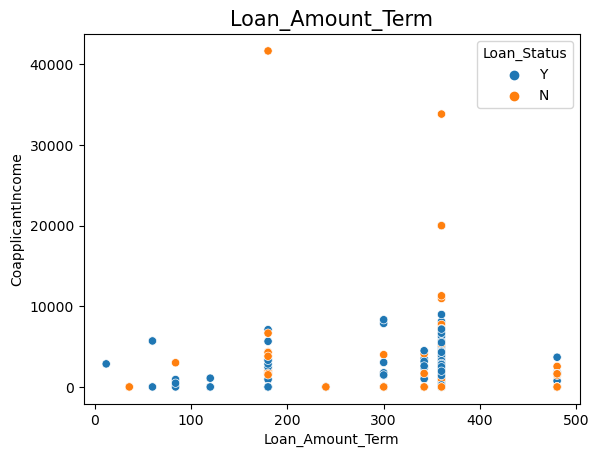

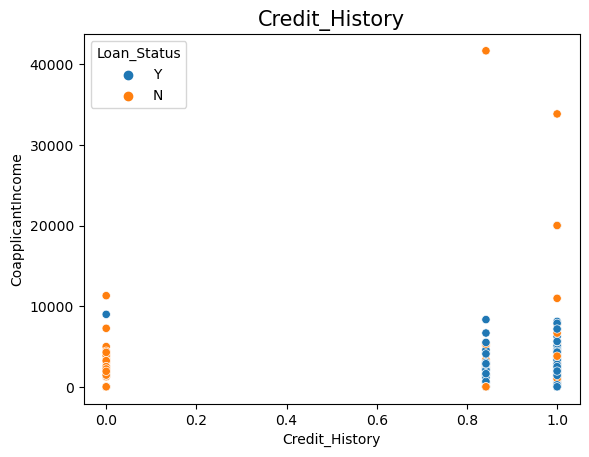

In [594]:
for i in numerical_col:
    sns.scatterplot(x=i,y='CoapplicantIncome',data=df,hue='Loan_Status')
    plt.title(i,fontsize=15)
    plt.show()

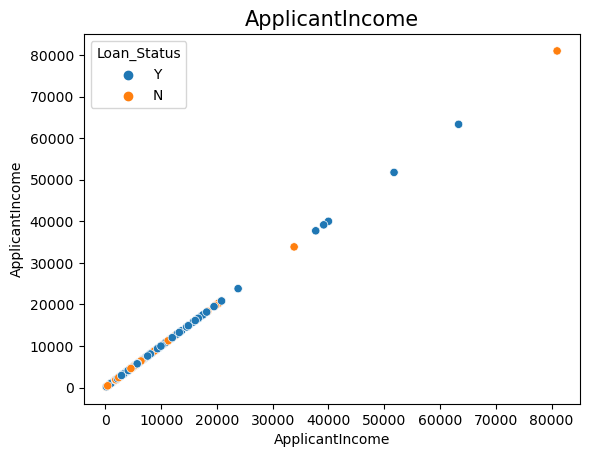

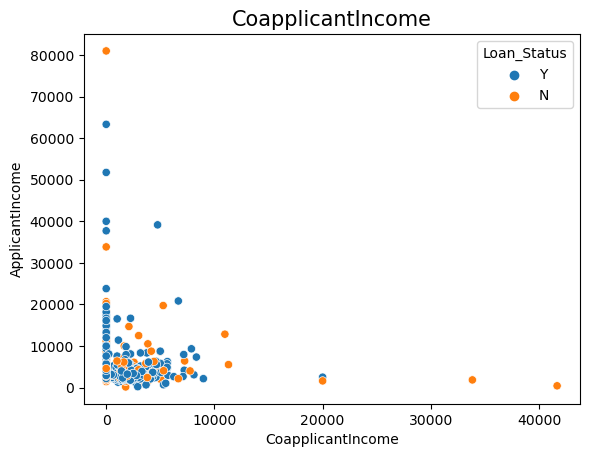

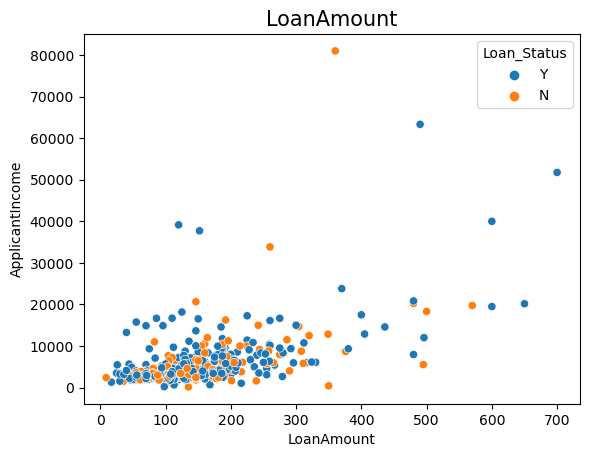

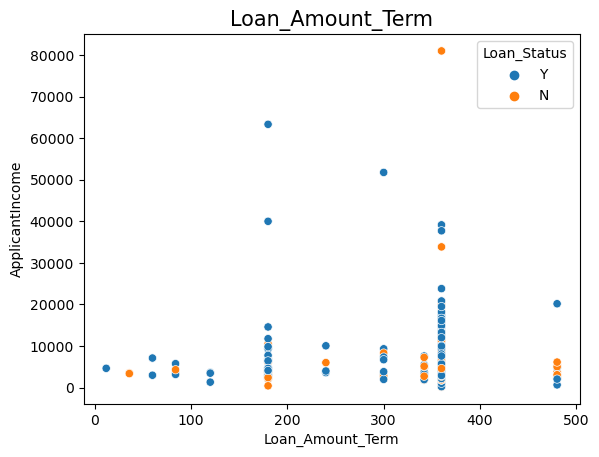

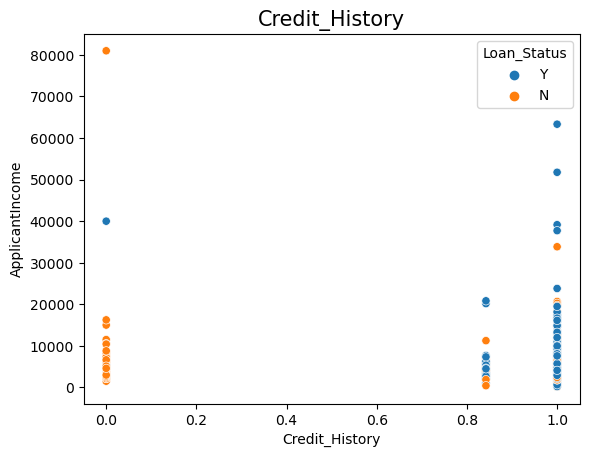

In [595]:
for i in numerical_col:
    sns.scatterplot(x=i,y='ApplicantIncome',data=df,hue='Loan_Status')
    plt.title(i,fontsize=15)
    plt.show()

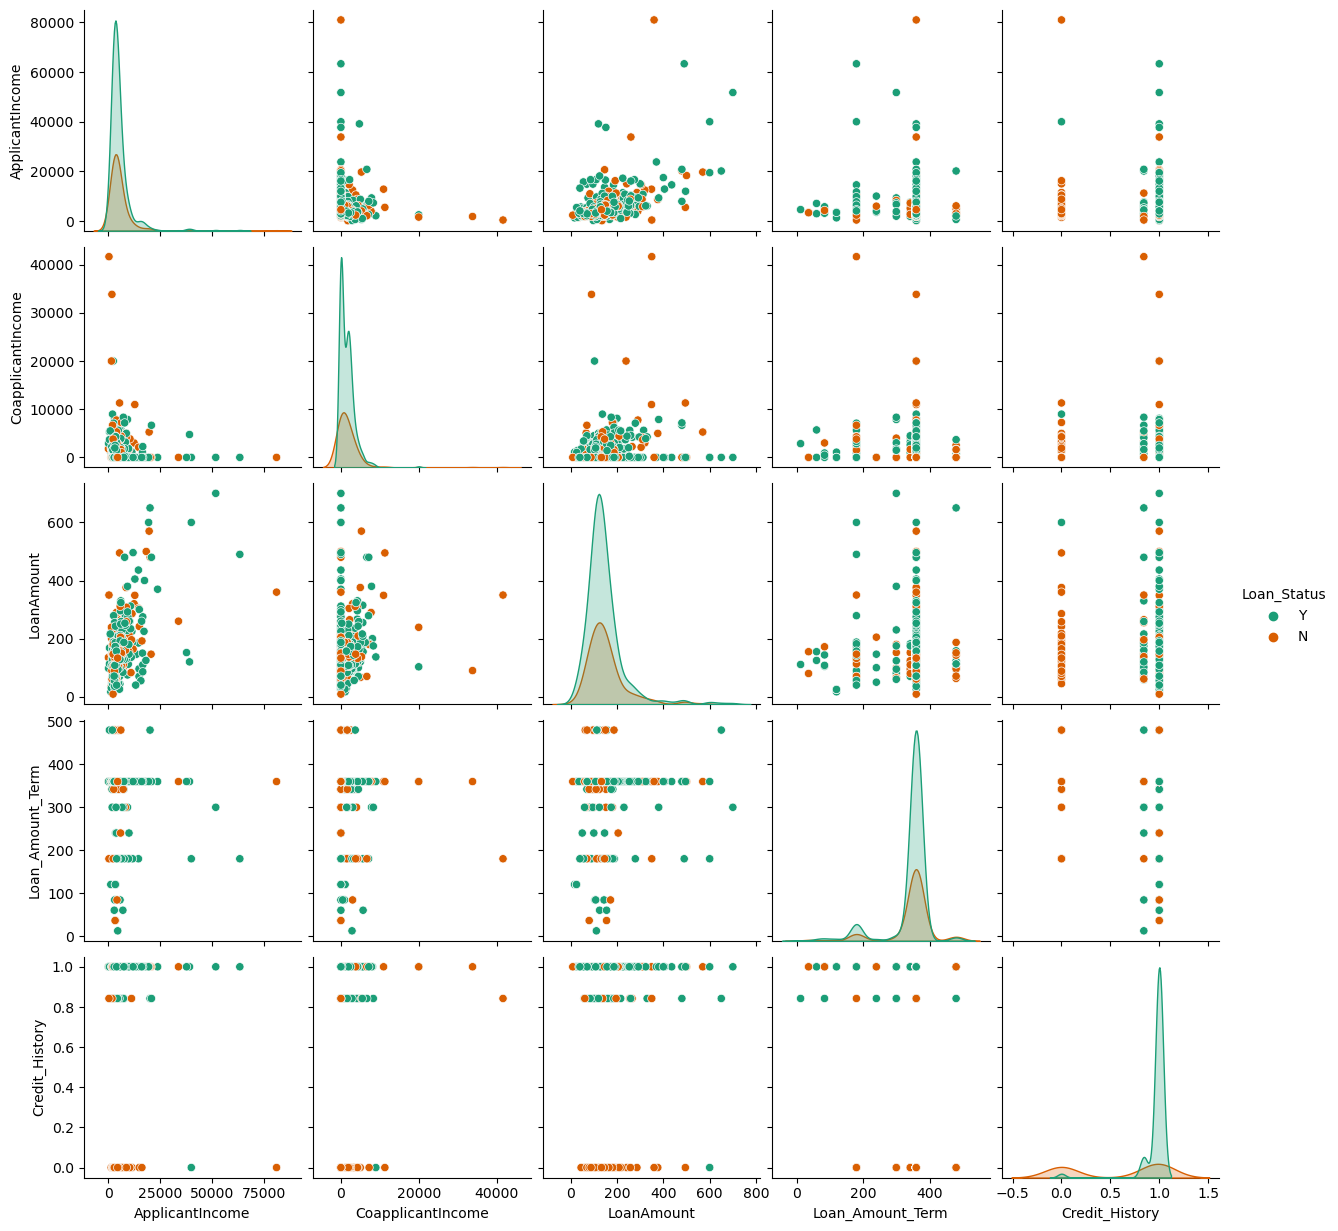

In [596]:
sns.pairplot(df,palette='Dark2',hue='Loan_Status')

# Checking the skeweness 

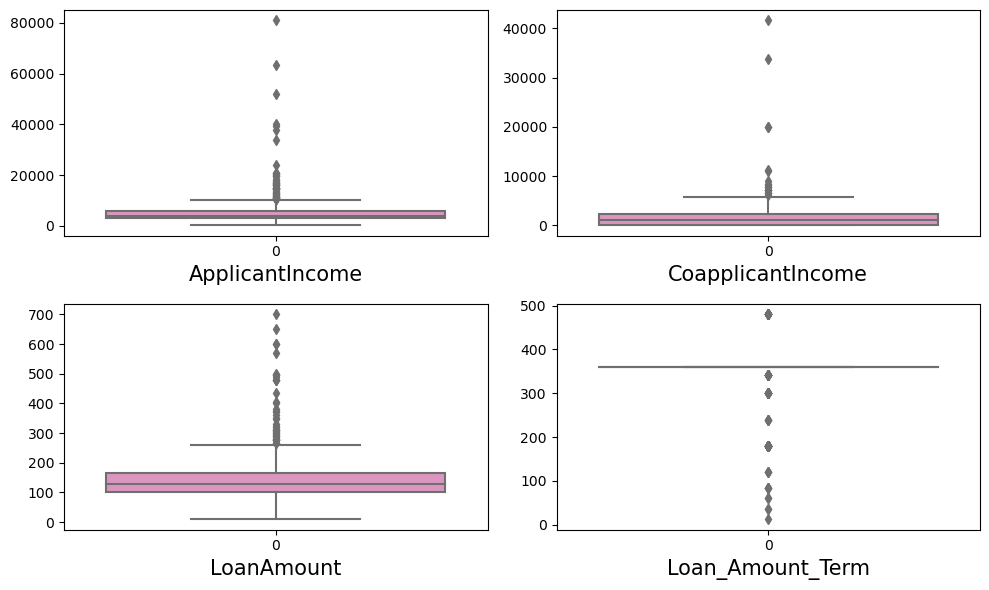

In [597]:
# let's check the outliers by plotting boxplot

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [598]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [599]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['Loan_Amount_Term']=np.sqrt(df['Loan_Amount_Term'])
df['Credit_History']=np.sqrt(df['Credit_History'])

In [600]:
df.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.175195
Credit_History      -2.005377
dtype: float64

In [601]:

df['Credit_History']=df['Credit_History']**2
df['Loan_Amount_Term']=df['Loan_Amount_Term']**2

In [602]:
df.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [603]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'] **3
df['Credit_History']=df['Credit_History']**3

In [604]:
df.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term     0.385161
Credit_History      -1.718076
dtype: float64

here we have decreased the skeweness 

# Label Encoding using (Ordinal Encoder)

In [605]:
OE=OrdinalEncoder()

In [606]:
for i in df.columns:
    if df.dtypes[i]=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,18.017473,0.000000,5.270588,46656000.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,16.610522,11.467457,5.039684,46656000.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,14.422496,0.000000,4.041240,46656000.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,13.720654,13.310098,4.932424,46656000.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,18.171206,0.000000,5.204828,46656000.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,14.260431,0.000000,4.140818,46656000.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,16.013010,0.000000,3.419952,5832000.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,20.059821,6.214465,6.324704,46656000.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,19.646281,0.000000,5.718479,46656000.0,1.0,2.0,1.0


In [608]:
cor=df.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.017662,-0.013743,0.034361,-0.021653,-0.034278,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.075111,0.208217,0.135750,-0.079687,0.018045,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.034547,0.280112,0.174273,-0.122902,-0.002130,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.122477,-0.004252,0.163877,-0.098837,-0.032040,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.181428,0.010615,-0.158991,-0.062491,-0.082209,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.188492,-0.074737,0.115086,-0.038962,-0.003282,-0.030860,-0.003700
ApplicantIncome,0.017662,0.075111,0.034547,0.122477,-0.181428,0.188492,1.000000,-0.325066,0.555728,-0.054514,0.022862,-0.024827,0.004341
CoapplicantIncome,-0.013743,0.208217,0.280112,-0.004252,0.010615,-0.074737,-0.325066,1.000000,0.158113,-0.013993,-0.015364,-0.052318,0.033582
LoanAmount,0.034361,0.135750,0.174273,0.163877,-0.158991,0.115086,0.555728,0.158113,1.000000,0.048427,-0.025908,-0.077644,-0.042714
Loan_Amount_Term,-0.021653,-0.079687,-0.122902,-0.098837,-0.062491,-0.038962,-0.054514,-0.013993,0.048427,1.000000,-0.004428,-0.046630,-0.050942


<Axes: >

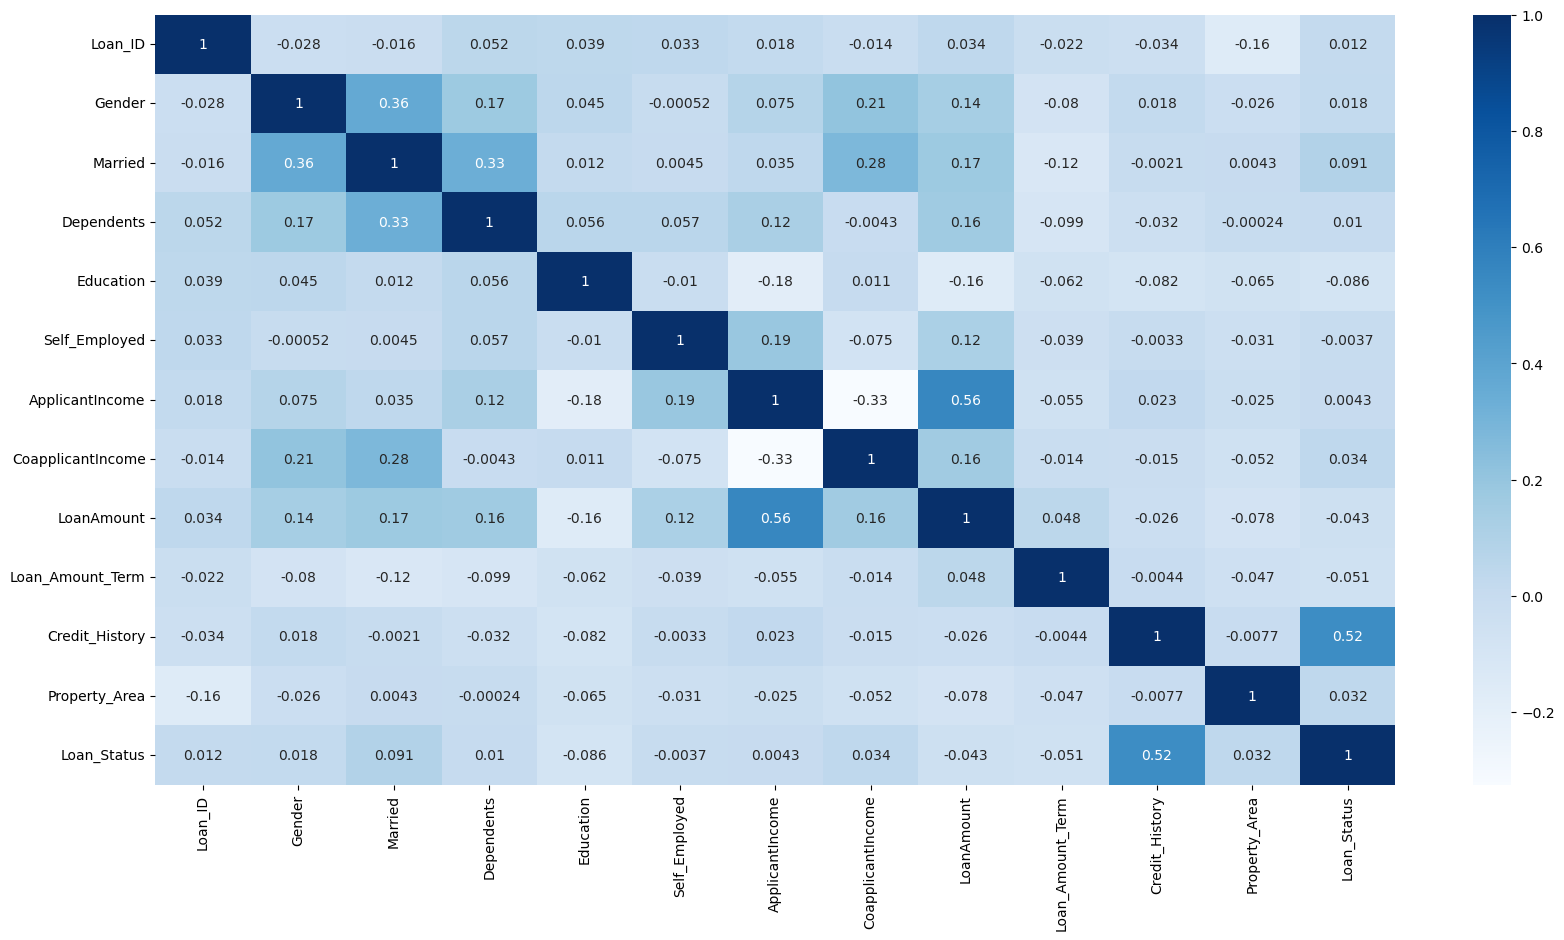

In [610]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,cmap='Blues',annot=True)

In [611]:
cor['Loan_Status'].sort_values(ascending=True)

Education           -0.085884
Loan_Amount_Term    -0.050942
LoanAmount          -0.042714
Self_Employed       -0.003700
ApplicantIncome      0.004341
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
CoapplicantIncome    0.033582
Married              0.091478
Credit_History       0.524452
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

# Separating features and label

In [614]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (614, 12)
label dimension (614,)


# Feature Scaling using (Standard Scaler)

In [617]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729232,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.380325,-1.053225,0.169528,0.186091,0.499610,1.223298
1,-1.723590,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.022870,0.561256,-0.100752,0.186091,0.499610,-1.318513
2,-1.717948,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.533028,-1.053225,-1.269462,0.186091,0.499610,1.223298
3,-1.712307,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.711341,0.820678,-0.226303,0.186091,0.499610,1.223298
4,-1.706665,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.419383,-1.053225,0.092554,0.186091,0.499610,1.223298
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.574203,-1.053225,-1.152903,0.186091,0.499610,-1.318513
610,1.712307,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.128936,-1.053225,-1.996700,-2.309618,0.499610,-1.318513
611,1.717948,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.899211,-0.178302,1.403404,0.186091,0.499610,1.223298
612,1.723590,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.794146,-1.053225,0.693799,0.186091,0.499610,1.223298


# Checking variance_inflation_factor

In [620]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif


,VIF values,features
0,1.033970,Loan_ID
1,1.199158,Gender
2,1.365196,Married
3,1.179530,Dependents
4,1.071454,Education
5,1.041708,Self_Employed
6,2.052898,ApplicantIncome
7,1.530099,CoapplicantIncome
8,1.851951,LoanAmount
9,1.049003,Loan_Amount_Term


it looks perfect their is no need to drop any feature.

In [621]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

here we have to balance the target variable values.

# over sampling using (SMOTE)

In [624]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [625]:
print(y.value_counts())

1.0    422
0.0    422
Name: Loan_Status, dtype: int64


as we can see the value of target variable is equal.

# modeling 

In [634]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfr=RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('the best accuracy score is',maxAccu, 'and random_state is',maxRS)

the best accuracy score is 0.8937007874015748 and random_state is 88


# creating train_test_split

In [638]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Logistic Regression.

In [647]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.6889763779527559
[[ 64  63]
 [ 16 111]]
              precision    recall  f1-score   support

         0.0       0.80      0.50      0.62       127
         1.0       0.64      0.87      0.74       127

    accuracy                           0.69       254
   macro avg       0.72      0.69      0.68       254
weighted avg       0.72      0.69      0.68       254



# Decision Tree Classifier

In [652]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.7834645669291339
[[108  19]
 [ 36  91]]
              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       127
         1.0       0.83      0.72      0.77       127

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.79      0.78      0.78       254



# SVC (Support vector classifier)

In [653]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.7519685039370079
[[ 75  52]
 [ 11 116]]
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70       127
         1.0       0.69      0.91      0.79       127

    accuracy                           0.75       254
   macro avg       0.78      0.75      0.75       254
weighted avg       0.78      0.75      0.75       254



# KNeighbors Classifier

In [654]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

0.7519685039370079
[[98 29]
 [34 93]]
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       127
         1.0       0.76      0.73      0.75       127

    accuracy                           0.75       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.75      0.75      0.75       254



# Random Forest Classifier.

In [656]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.889763779527559
[[105  22]
 [  6 121]]
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88       127
         1.0       0.85      0.95      0.90       127

    accuracy                           0.89       254
   macro avg       0.90      0.89      0.89       254
weighted avg       0.90      0.89      0.89       254



# Extra Trees Classifier

In [659]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(accuracy_score(y_test,pred_etc))
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

0.8543307086614174
[[106  21]
 [ 16 111]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       127
         1.0       0.84      0.87      0.86       127

    accuracy                           0.85       254
   macro avg       0.85      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254



# Ada Boost Classifier

In [661]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
pred_adc=adc.predict(x_test)
print(accuracy_score(y_test,pred_adc))
print(confusion_matrix(y_test,pred_adc))
print(classification_report(y_test,pred_adc))

0.7952755905511811
[[ 91  36]
 [ 16 111]]
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       127
         1.0       0.76      0.87      0.81       127

    accuracy                           0.80       254
   macro avg       0.80      0.80      0.79       254
weighted avg       0.80      0.80      0.79       254



# Gradient Boosting Classifier

In [662]:
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print(accuracy_score(y_test,pred_gbr))
print(confusion_matrix(y_test,pred_gbr))
print(classification_report(y_test,pred_gbr))

0.8582677165354331
[[ 99  28]
 [  8 119]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85       127
         1.0       0.81      0.94      0.87       127

    accuracy                           0.86       254
   macro avg       0.87      0.86      0.86       254
weighted avg       0.87      0.86      0.86       254



# cross validation score

In [663]:
score1=cross_val_score(lg,x,y)
print(score1)
print(score1.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_lg)-score1.mean())*100)

[0.69230769 0.63905325 0.70414201 0.65088757 0.57738095]
0.6527542969850663
difference between the cross validation score and accuracy score 3.622208096768964


In [665]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_dtc)-score2.mean())*100)

[0.36686391 0.32544379 0.37278107 0.69230769 0.47619048]
0.4467173851789236
difference between the cross validation score and accuracy score 33.67471817502103


In [666]:
score3=cross_val_score(svc,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_svc)-score3.mean())*100)

[0.68047337 0.65088757 0.71005917 0.70414201 0.63690476]
0.6764933784164553
difference between the cross validation score and accuracy score 7.547512552055258


In [667]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_knn)-score4.mean())*100)

[0.69822485 0.65088757 0.75147929 0.75739645 0.7202381 ]
0.7156452521837137
difference between the cross validation score and accuracy score 3.6323251753294206


In [668]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.36094675 0.34911243 0.56804734 0.71005917 0.47619048]
0.4928712313327698
difference between the cross validation score and accuracy score 39.689254819478926


In [669]:
score6=cross_val_score(etc,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_etc)-score6.mean())*100)

[0.69230769 0.67455621 0.84023669 0.84615385 0.61904762]
0.7344604113834883
difference between the cross validation score and accuracy score 11.987029727792908


In [671]:
score7=cross_val_score(adc,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_adc)-score7.mean())*100)

[0.33727811 0.27218935 0.37278107 0.47337278 0.44047619]
0.37921949845026764
difference between the cross validation score and accuracy score 41.60560921009135


In [672]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,pred_gbr)-score8.mean())*100)

[0.36686391 0.25443787 0.41420118 0.5147929  0.4702381 ]
0.4041067906452522
difference between the cross validation score and accuracy score 45.41609258901809


# Here Extra Trees classifier is giving the high accuracy it is our best performing model.

# Hyper Parameter tunning 

In [677]:
param={'n_estimators':[100,200,300,400],
      'criterion':['entropy','gini','log_loss'],
      'max_depth':[10,15,25,35],
      'n_jobs':[5,25,15,30]}

In [678]:
grid=GridSearchCV(ExtraTreesClassifier(),param,cv=5)

In [679]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [10, 15, 25, 35],
                         'n_estimators': [100, 200, 300, 400],
                         'n_jobs': [5, 25, 15, 30]})

In [681]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 15, 'n_estimators': 300, 'n_jobs': 30}

In [684]:
final_model1=ExtraTreesClassifier(criterion='gini',max_depth=10,n_estimators=200,n_jobs=25)
final_model1.fit(x_train,y_train)
pred1=final_model1.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

0.8346456692913385
[[ 91  36]
 [  6 121]]
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81       127
         1.0       0.77      0.95      0.85       127

    accuracy                           0.83       254
   macro avg       0.85      0.83      0.83       254
weighted avg       0.85      0.83      0.83       254



In [685]:
final_model2=ExtraTreesClassifier(criterion='log_loss',max_depth=15,n_estimators=300,n_jobs=30)
final_model2.fit(x_train,y_train)
pred2=final_model2.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

0.8503937007874016
[[ 97  30]
 [  8 119]]
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84       127
         1.0       0.80      0.94      0.86       127

    accuracy                           0.85       254
   macro avg       0.86      0.85      0.85       254
weighted avg       0.86      0.85      0.85       254



# saving the model

In [686]:
import joblib


In [687]:
joblib.dump(final_model2,'loan_application_file.pkl')

['loan_application_file.pkl']

In [688]:
output=joblib.load('loan_application_file.pkl')

In [689]:
output.predict(x_test)

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1.